This notebook contains the stock price forecasting using yfinance and Prophet package. Default parameters are used.

In [33]:
import yfinance as yf
import matplotlib.pyplot as plt
from fbprophet import Prophet
import pandas as pd  

In [2]:
# get Microsoft stock data
msft = yf.Ticker("MSFT")

# get stock info
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [4]:
# get historical market data
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056001,0.064236,0.056001,0.061491,1031788800,0.0,0.0
1986-03-14,0.061491,0.064785,0.061491,0.063687,308160000,0.0,0.0
1986-03-17,0.063687,0.065334,0.063687,0.064785,133171200,0.0,0.0
1986-03-18,0.064785,0.065334,0.062589,0.063138,67766400,0.0,0.0
1986-03-19,0.063138,0.063687,0.061491,0.062040,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2021-08-24,305.019989,305.649994,302.000000,302.619995,18175800,0.0,0.0
2021-08-25,304.299988,304.589996,300.420013,302.010010,20006100,0.0,0.0
2021-08-26,300.989990,302.429993,298.950012,299.089996,17666100,0.0,0.0


In [5]:
# data to use
df = hist.filter(['Date', 'Close'])
df.tail(5)

,Close
Date,
2021-08-24,302.619995
2021-08-25,302.010010
2021-08-26,299.089996
2021-08-27,299.720001
2021-08-30,303.589996


<AxesSubplot:xlabel='Date'>

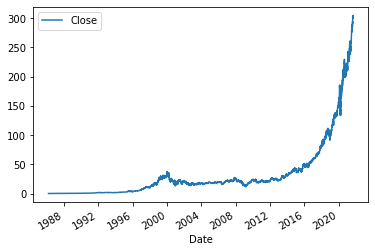

In [6]:
df.reset_index().plot(x='Date', y='Close')

In [7]:
df = df.reset_index()
df.columns = ['ds','y']

In [8]:
df['ds'] = pd.to_datetime(df['ds'])
df.head(5)

,ds,y
0,1986-03-13,0.061491
1,1986-03-14,0.063687
2,1986-03-17,0.064785
3,1986-03-18,0.063138
4,1986-03-19,0.062040


In [11]:
model = Prophet()

In [12]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future_dates = model.make_future_dataframe(periods=365)

In [19]:
prediction = model.predict(future_dates)

In [20]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1986-03-13,-0.286601,-16.793044,14.584653,-0.286601,-0.286601,-1.191901,-1.191901,-1.191901,-0.078173,-0.078173,-0.078173,-1.113728,-1.113728,-1.113728,0.0,0.0,0.0,-1.478502
1,1986-03-14,-0.285881,-15.674505,13.225327,-0.285881,-0.285881,-1.261893,-1.261893,-1.261893,-0.123697,-0.123697,-0.123697,-1.138196,-1.138196,-1.138196,0.0,0.0,0.0,-1.547774
2,1986-03-17,-0.283721,-18.035405,12.352515,-0.283721,-0.283721,-1.203787,-1.203787,-1.203787,-0.024997,-0.024997,-0.024997,-1.178790,-1.178790,-1.178790,0.0,0.0,0.0,-1.487508
3,1986-03-18,-0.283001,-17.040023,14.281805,-0.283001,-0.283001,-1.239155,-1.239155,-1.239155,-0.058006,-0.058006,-0.058006,-1.181149,-1.181149,-1.181149,0.0,0.0,0.0,-1.522156
4,1986-03-19,-0.282281,-15.561973,13.924885,-0.282281,-0.282281,-1.244179,-1.244179,-1.244179,-0.066248,-0.066248,-0.066248,-1.177931,-1.177931,-1.177931,0.0,0.0,0.0,-1.526460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9300,2022-08-26,243.619957,229.834793,259.727989,241.840143,245.706420,1.304339,1.304339,1.304339,-0.123697,-0.123697,-0.123697,1.428036,1.428036,1.428036,0.0,0.0,0.0,244.924296
9301,2022-08-27,243.700961,229.404609,260.060175,241.915694,245.811658,1.493534,1.493534,1.493534,0.175561,0.175561,0.175561,1.317973,1.317973,1.317973,0.0,0.0,0.0,245.194495
9302,2022-08-28,243.781965,229.908185,260.319030,241.982772,245.916896,1.373192,1.373192,1.373192,0.175561,0.175561,0.175561,1.197631,1.197631,1.197631,0.0,0.0,0.0,245.155157
9303,2022-08-29,243.862969,230.280334,260.567623,242.040735,246.022134,1.043094,1.043094,1.043094,-0.024997,-0.024997,-0.024997,1.068091,1.068091,1.068091,0.0,0.0,0.0,244.906063


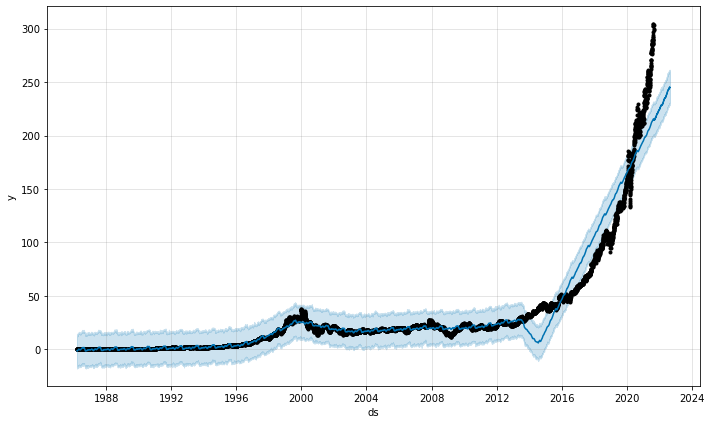

In [21]:
model.plot(prediction)
plt.show()

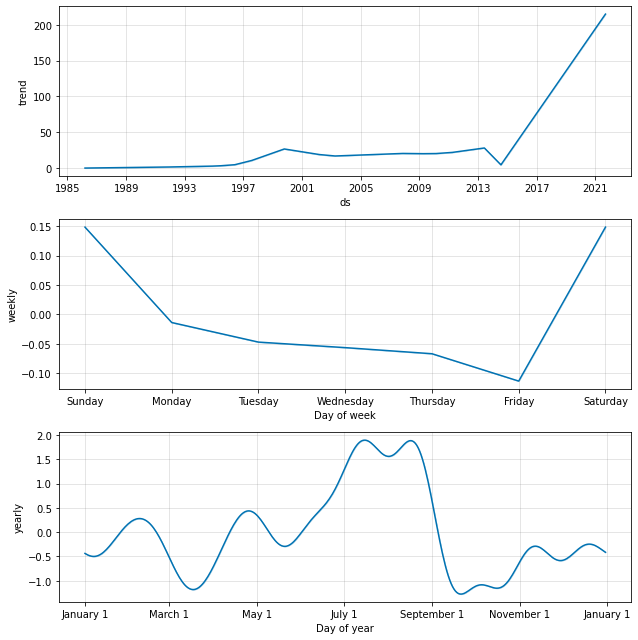

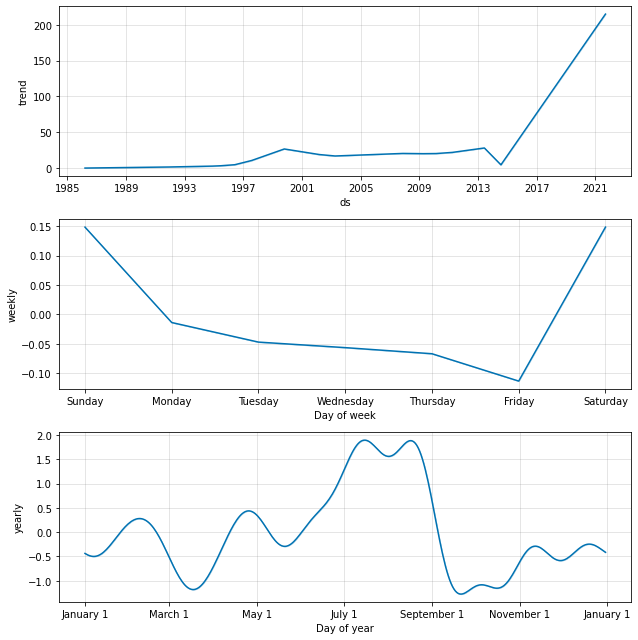

In [30]:
model.plot_components(prediction)

In [31]:
prediction[(prediction['ds'] >= '2021-08-01') & (prediction['ds'] <= '2021-10-01')]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
8919,2021-08-02,212.109350,198.699201,228.403430,212.109350,212.109350,1.535052,1.535052,1.535052,-0.024997,-0.024997,-0.024997,1.560050,1.560050,1.560050,0.0,0.0,0.0,213.644402
8920,2021-08-03,212.190354,199.298343,229.754123,212.190354,212.190354,1.508489,1.508489,1.508489,-0.058006,-0.058006,-0.058006,1.566495,1.566495,1.566495,0.0,0.0,0.0,213.698843
8921,2021-08-04,212.271358,199.230020,229.639665,212.271358,212.271358,1.512347,1.512347,1.512347,-0.066248,-0.066248,-0.066248,1.578596,1.578596,1.578596,0.0,0.0,0.0,213.783706
8922,2021-08-05,212.352362,199.381463,228.992860,212.352362,212.352362,1.517838,1.517838,1.517838,-0.078173,-0.078173,-0.078173,1.596011,1.596011,1.596011,0.0,0.0,0.0,213.870200
8923,2021-08-06,212.433366,199.305472,229.154158,212.433366,212.433366,1.494516,1.494516,1.494516,-0.123697,-0.123697,-0.123697,1.618213,1.618213,1.618213,0.0,0.0,0.0,213.927882
8924,2021-08-09,212.676379,199.340999,230.051916,212.676379,212.676379,1.680621,1.680621,1.680621,-0.024997,-0.024997,-0.024997,1.705618,1.705618,1.705618,0.0,0.0,0.0,214.356999
8925,2021-08-10,212.757383,199.190042,230.064006,212.757383,212.757383,1.680277,1.680277,1.680277,-0.058006,-0.058006,-0.058006,1.738283,1.738283,1.738283,0.0,0.0,0.0,214.437660
8926,2021-08-11,212.838387,199.655989,230.631148,212.838387,212.838387,1.704453,1.704453,1.704453,-0.066248,-0.066248,-0.066248,1.770701,1.770701,1.770701,0.0,0.0,0.0,214.542840
8927,2021-08-12,212.919391,199.923279,231.325580,212.919391,212.919391,1.723362,1.723362,1.723362,-0.078173,-0.078173,-0.078173,1.801536,1.801536,1.801536,0.0,0.0,0.0,214.642754
8928,2021-08-13,213.000395,199.072509,230.652816,213.000395,213.000395,1.705706,1.705706,1.705706,-0.123697,-0.123697,-0.123697,1.829403,1.829403,1.829403,0.0,0.0,0.0,214.706101
